# Tugas Praktikum

1. Tugas K-Means

In [ ]:
df = pd.read_csv('/Mall_Customers.csv')

df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

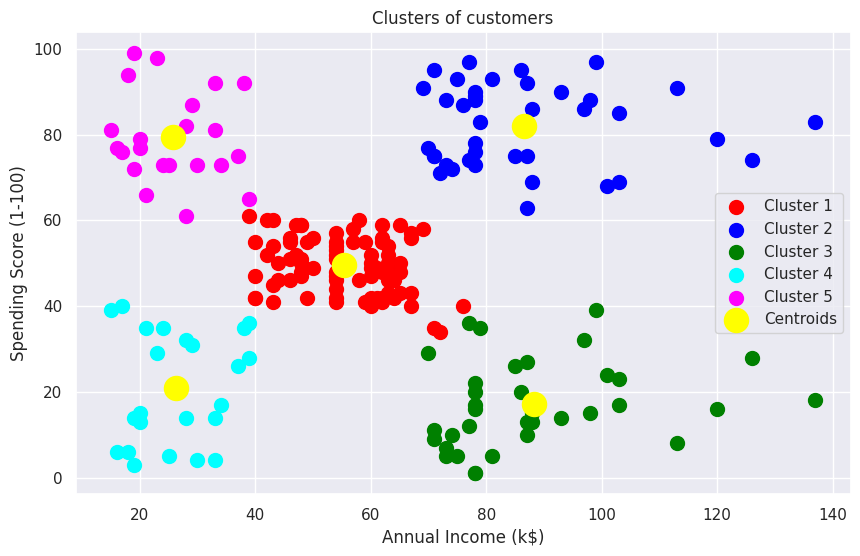

In [ ]:
# 2. Menentukan fitur yang tepat untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Membuat model K-Means dengan mempertimbangkan jumlah k yang terbaik
# Menggunakan metode Elbow untuk menemukan jumlah k yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Membuat model K-Means dengan k=5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

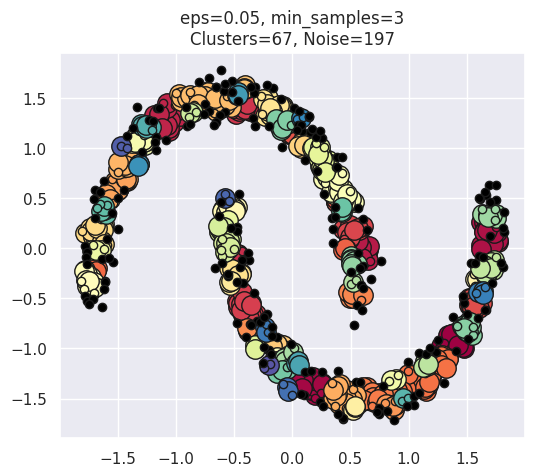

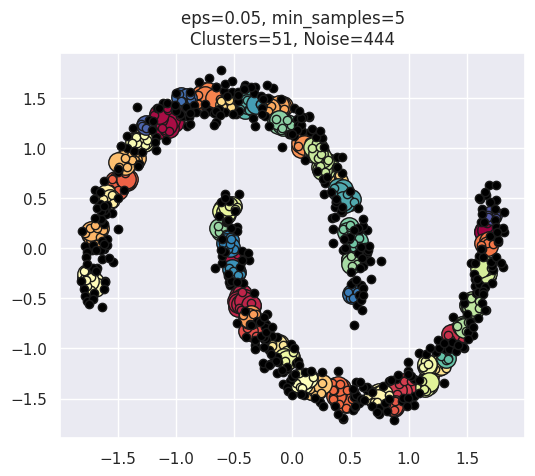

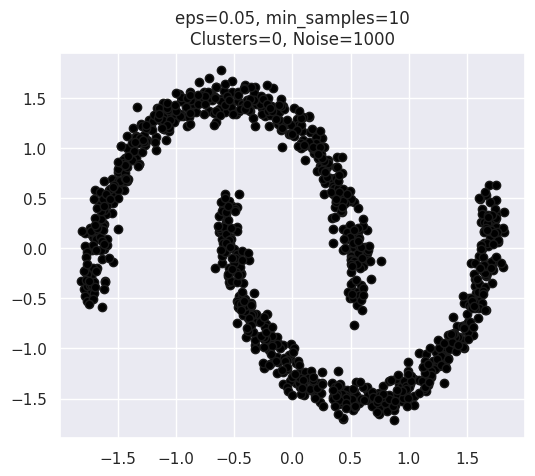

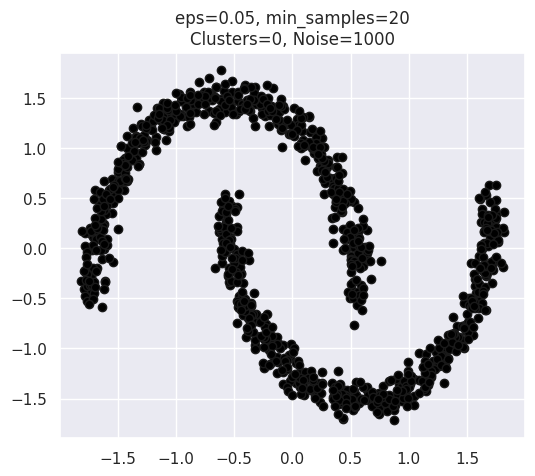

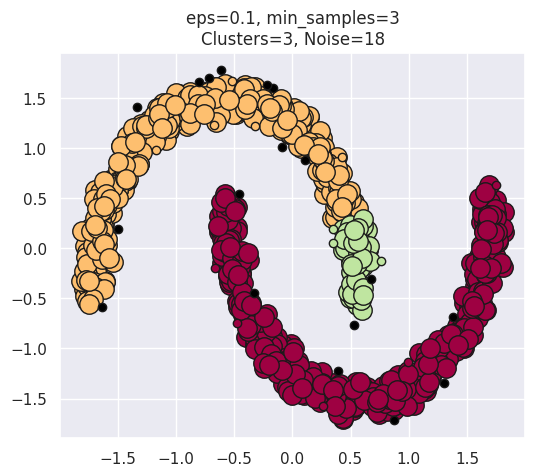

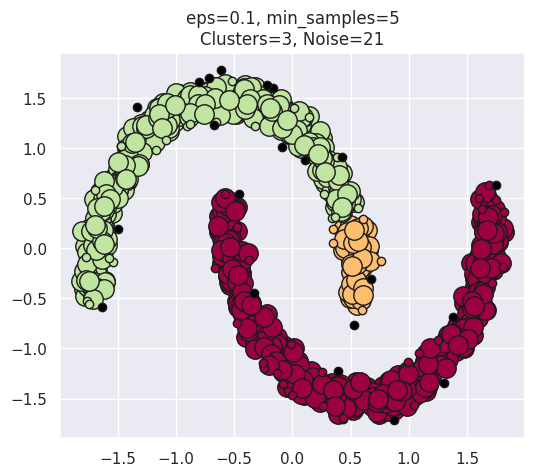

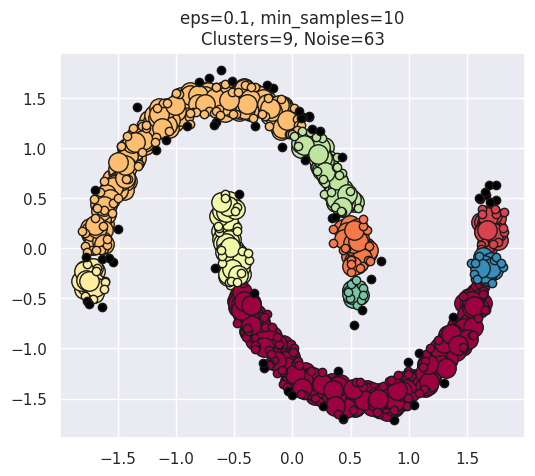

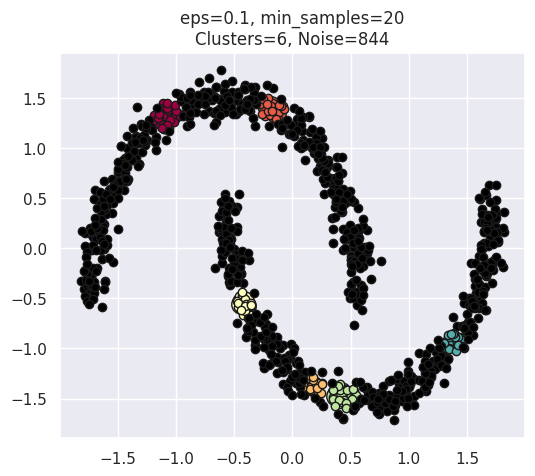

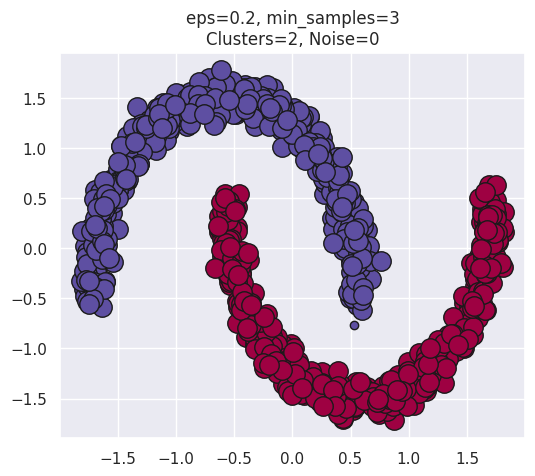

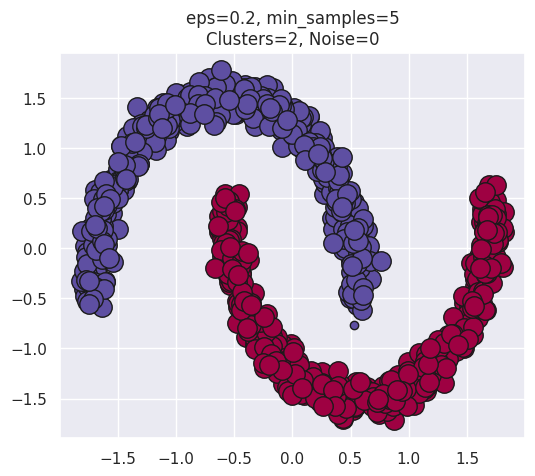

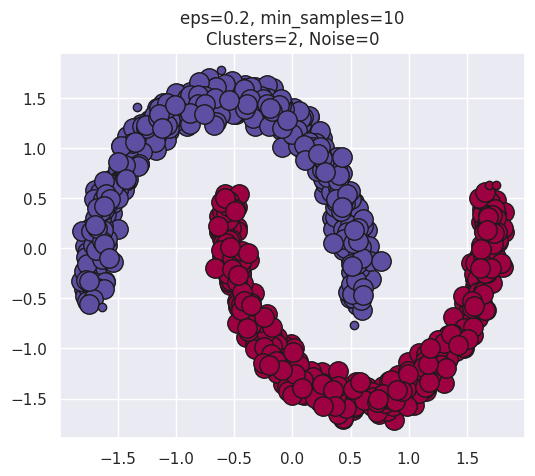

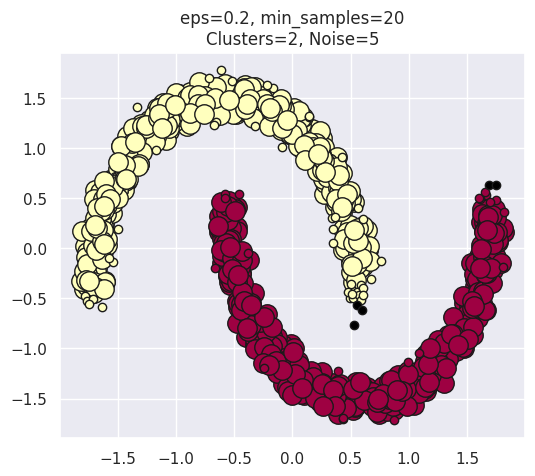

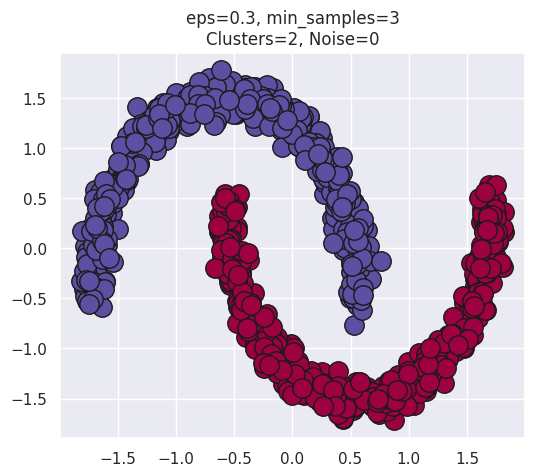

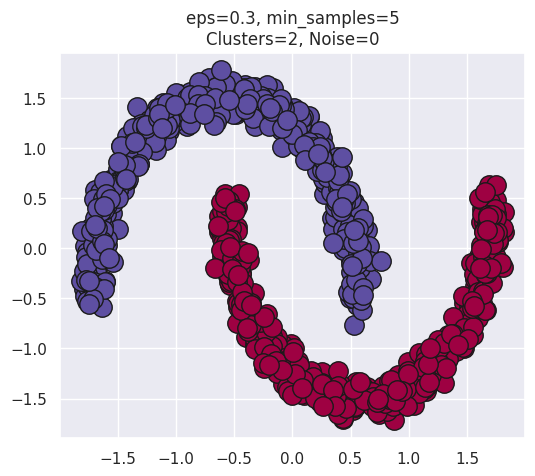

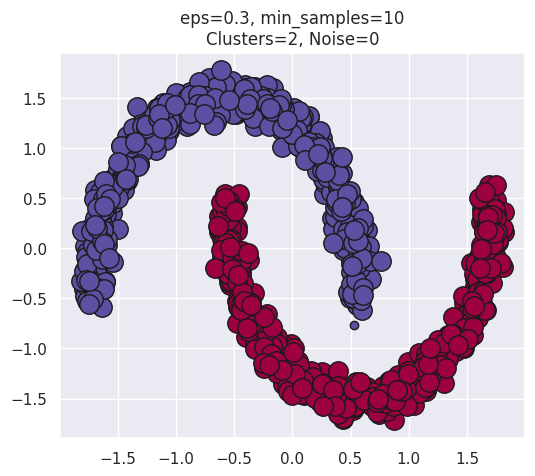

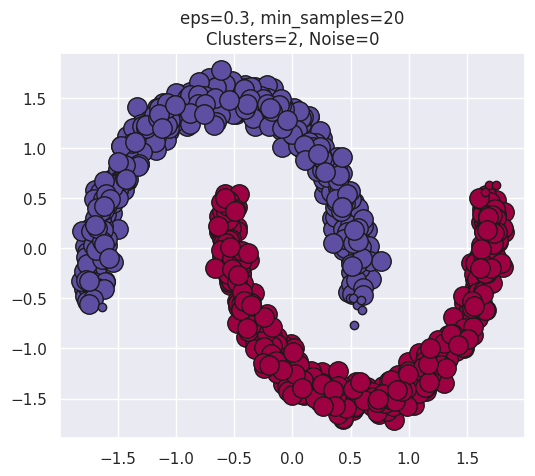

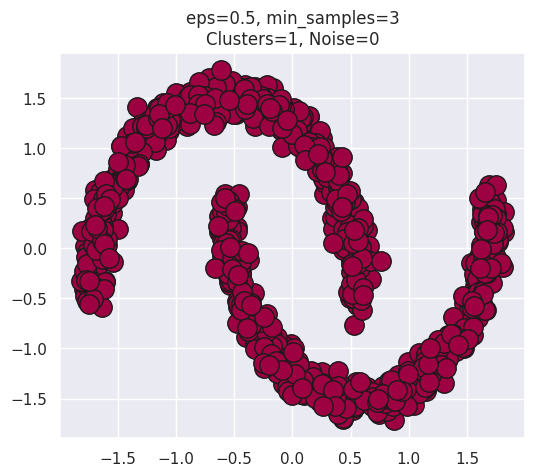

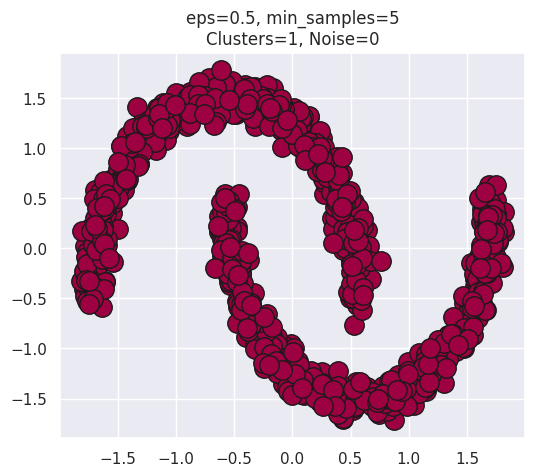

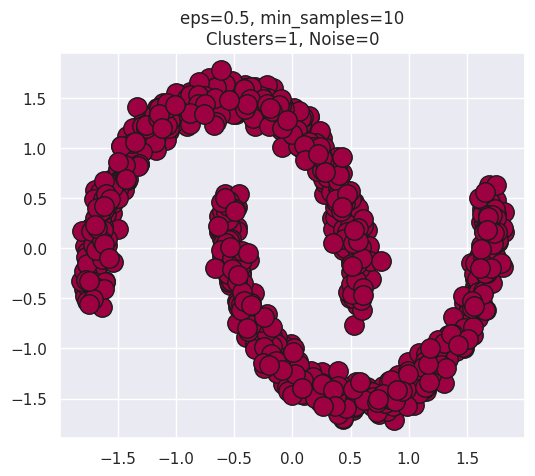

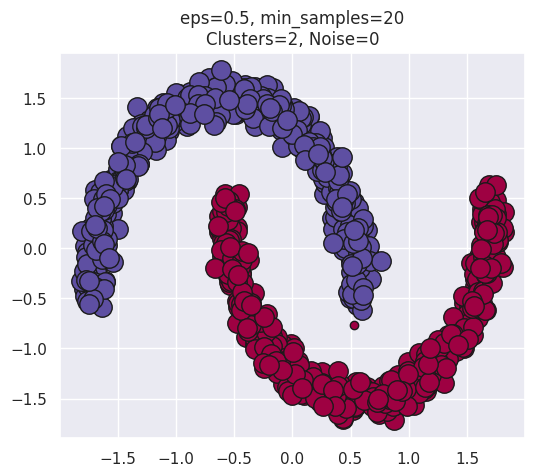

     eps  min_samples  clusters  noise  homogeneity  completeness  v_measure  \
0   0.05            3        67    197     0.803825      0.154915   0.259767   
1   0.05            5        51    444     0.556006      0.137314   0.220237   
2   0.05           10         0   1000    -1.000000     -1.000000  -1.000000   
3   0.05           20         0   1000    -1.000000     -1.000000  -1.000000   
4   0.10            3         3     18     0.983471      0.708395   0.823571   
5   0.10            5         3     21     0.980716      0.699589   0.816635   
6   0.10           10         9     63     0.938949      0.358282   0.518656   
7   0.10           20         6    844     0.157108      0.153385   0.155224   
8   0.20            3         2      0     1.000000      1.000000   1.000000   
9   0.20            5         2      0     1.000000      1.000000   1.000000   
10  0.20           10         2      0     1.000000      1.000000   1.000000   
11  0.20           20         2      5  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

# 1. Buat dataset make_moons
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Normalisasi
X = StandardScaler().fit_transform(X)

# 2. Fungsi untuk menjalankan DBSCAN dan evaluasi
def run_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # core sample mask
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    # Hitung jumlah cluster (kecuali noise = -1)
    unique_labels = set(labels)
    n_clusters_ = len([k for k in unique_labels if k != -1])
    n_noise_ = list(labels).count(-1)

    # Evaluasi metrik (jika cluster > 1 agar Silhouette valid)
    if n_clusters_ > 1:
        homogeneity = metrics.homogeneity_score(labels_true, labels)
        completeness = metrics.completeness_score(labels_true, labels)
        v_measure = metrics.v_measure_score(labels_true, labels)
        ari = metrics.adjusted_rand_score(labels_true, labels)
        ami = metrics.adjusted_mutual_info_score(labels_true, labels)
        silhouette = metrics.silhouette_score(X, labels)
    else:
        homogeneity = completeness = v_measure = ari = ami = silhouette = -1

    # Visualisasi
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=(6, 5))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # hitam untuk noise
        class_member_mask = (labels == k)

        # core samples
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0], xy[:, 1], "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        # non-core samples
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0], xy[:, 1], "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title(f"eps={eps}, min_samples={min_samples}\nClusters={n_clusters_}, Noise={n_noise_}")
    plt.show()

    return {
        "eps": eps,
        "min_samples": min_samples,
        "clusters": n_clusters_,
        "noise": n_noise_,
        "homogeneity": homogeneity,
        "completeness": completeness,
        "v_measure": v_measure,
        "ARI": ari,
        "AMI": ami,
        "silhouette": silhouette,
    }

# 3. Eksperimen
results = []
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

for eps in eps_values:
    for ms in min_samples_values:
        res = run_dbscan(X, eps, ms)
        results.append(res)

# 4. Rekap hasil
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


2. Tugas DBSCAN

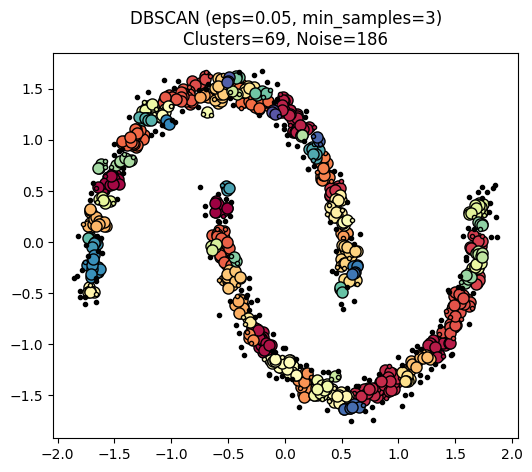

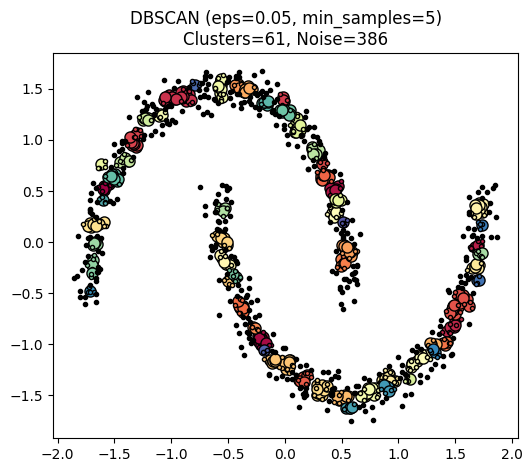

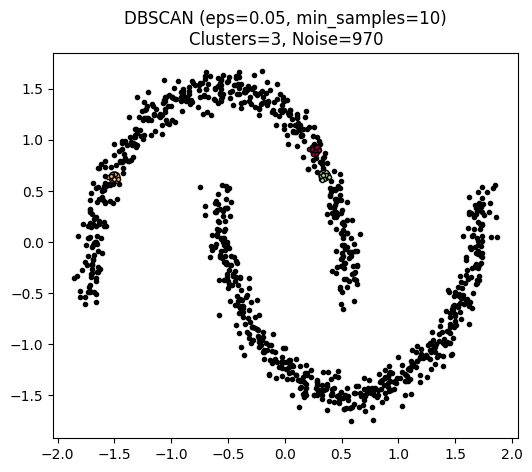

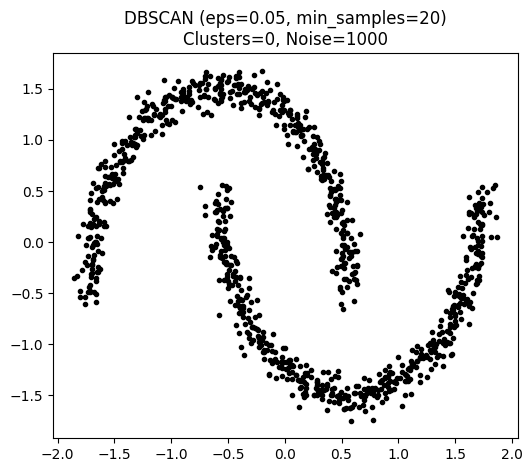

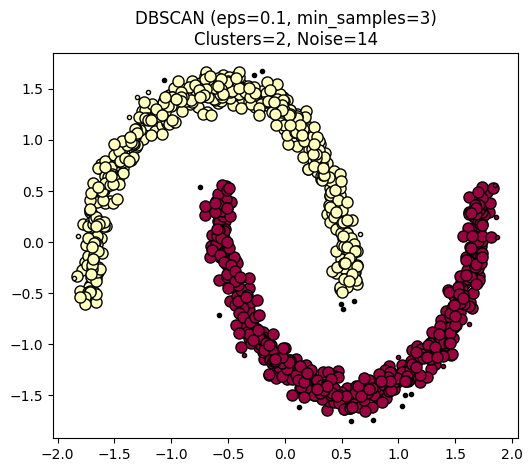

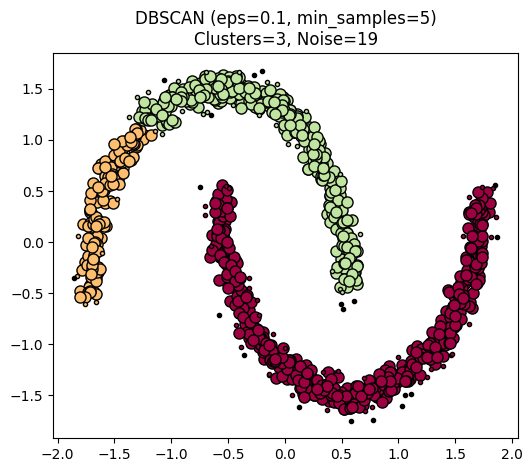

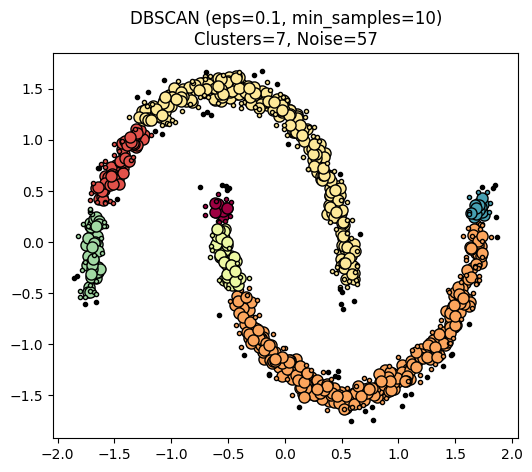

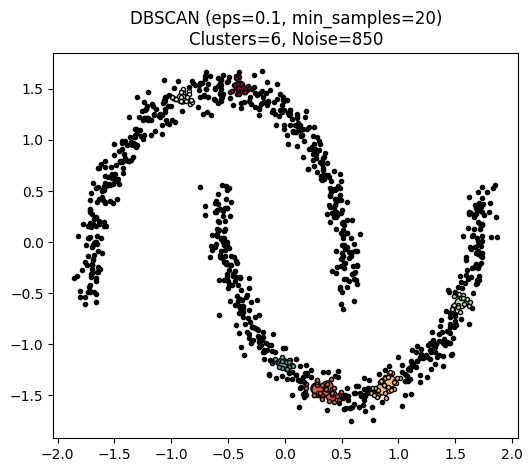

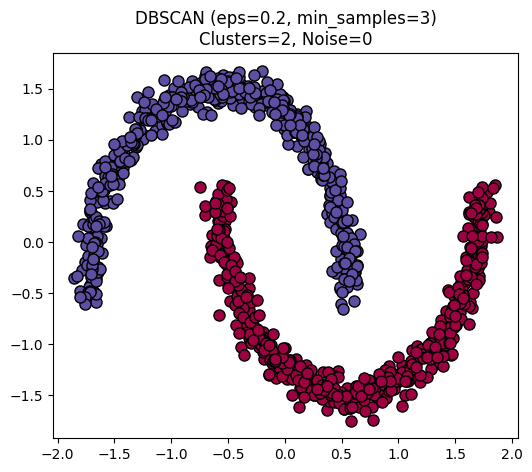

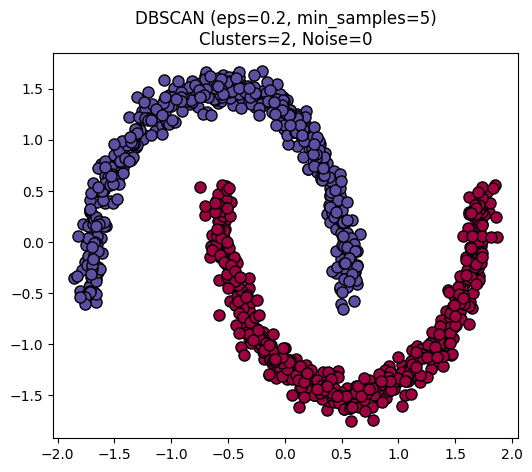

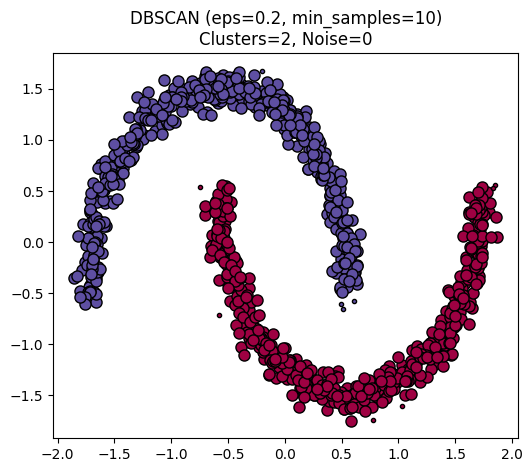

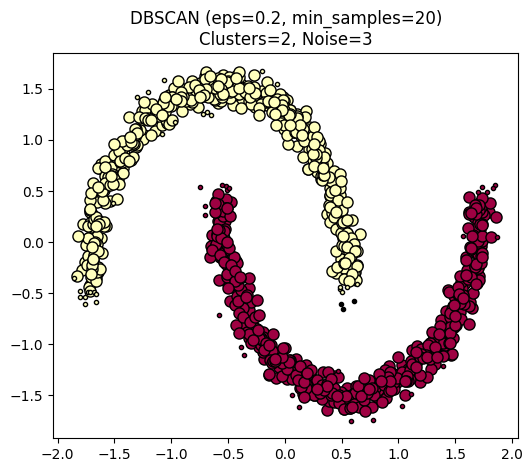

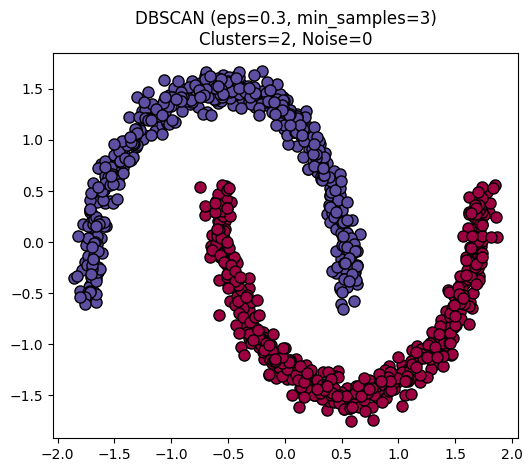

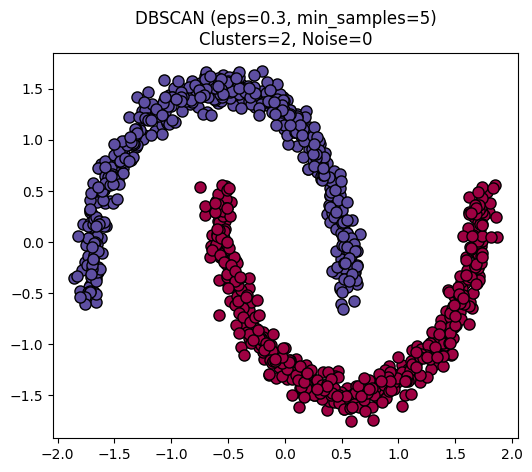

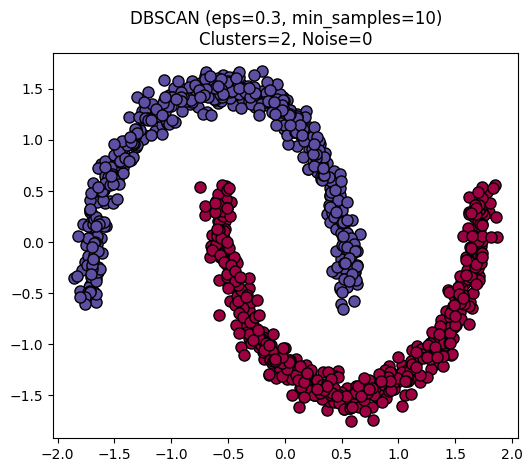

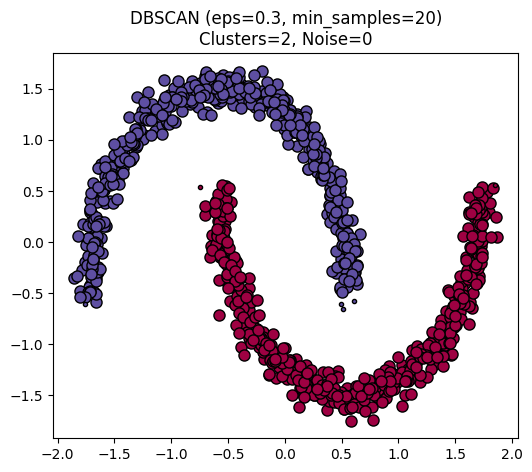

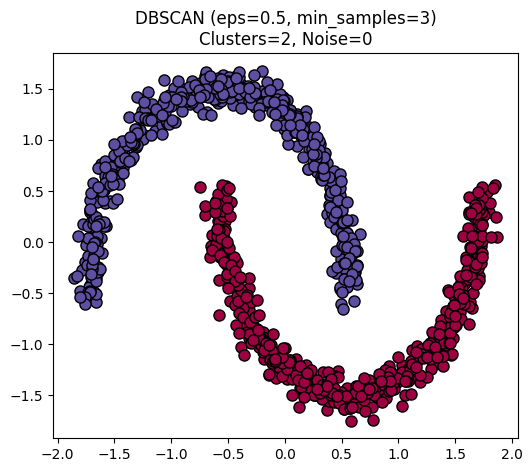

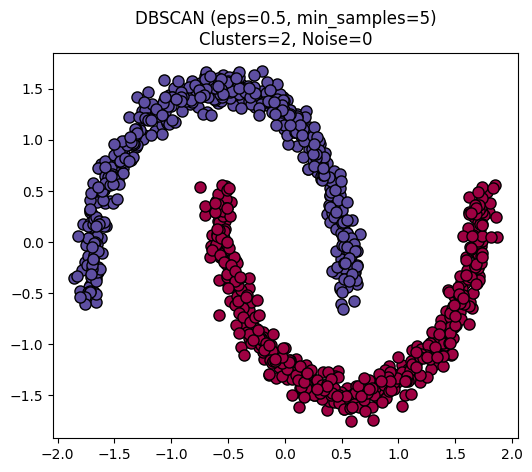

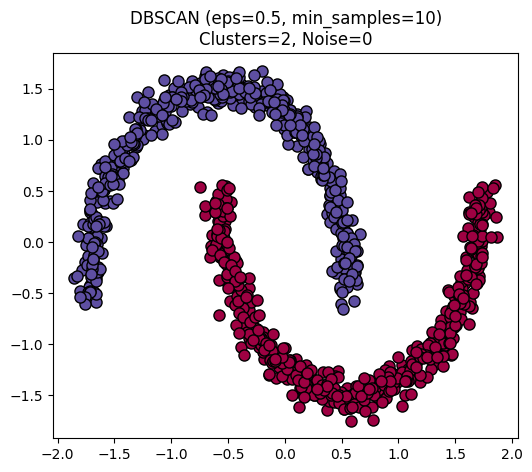

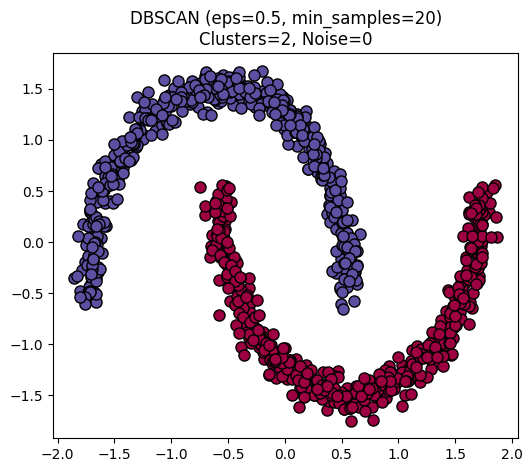

eps  min_samples  clusters  noise  Homogeneity  Completeness  V-measure  \
0   0.05            3        69    186     0.815554      0.152548   0.257021   
1   0.05            5        61    386     0.615466      0.136931   0.224021   
2   0.05           10         3    970     0.030669      0.126764   0.049389   
3   0.05           20         0   1000          NaN           NaN        NaN   
4   0.10            3         2     14     0.986207      0.902896   0.942714   
5   0.10            5         3     19     0.981343      0.632772   0.769420   
6   0.10           10         7     57     0.943317      0.409546   0.571132   
7   0.10           20         6    850     0.153928      0.155466   0.154693   
8   0.20            3         2      0     1.000000      1.000000   1.000000   
9   0.20            5         2      0     1.000000      1.000000   1.000000   
10  0.20           10         2      0     1.000000      1.000000   1.000000   
11  0.20           20         2      3     1.000000      0.974224   0.986944   
12  0.30            3         2      0     1.000000      1.000000   1.000000   
13  0.30            5         2      0     1.000000      1.000000   1.000000   
14  0.30           10         2      0     1.000000      1.000000   1.000000   
15  0.30           20         2      0     1.000000      1.000000   1.000000   
16  0.50            3         2      0     1.000000      1.000000   1.000000   
17  0.50            5         2      0     1.000000      1.000000   1.000000   
18  0.50           10         2      0     1.000000      1.000000   1.000000   
19  0.50           20         2      0     1.000000      1.000000   1.000000   

         ARI       AMI  Silhouette  
0   0.030044  0.243805    0.112929  
1   0.015642  0.210259   -0.048518  
2   0.002283  0.045864   -0.294190  
3        NaN       NaN         NaN  
4   0.972179  0.942634    0.251690  
5   0.758440  0.769024    0.290689  
6   0.523399  0.569801    0.162306  
7   0.016754  0.150916   -0.360195  
8   1.000000  1.000000    0.391160  
9   1.000000  1.000000    0.391160  
10  1.000000  1.000000    0.391160  
11  0.994030  0.986923    0.027580  
12  1.000000  1.000000    0.391160  
13  1.000000  1.000000    0.391160  
14  1.000000  1.000000    0.391160  
15  1.000000  1.000000    0.391160  
16  1.000000  1.000000    0.391160  
17  1.000000  1.000000    0.391160  
18  1.000000  1.000000    0.391160  
19  1.000000  1.000000    0.391160

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    homogeneity_score, completeness_score, v_measure_score,
    adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
)
import pandas as pd

# 1. Membuat dataset make_moons
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# 2. Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Definisikan kombinasi parameter
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

results = []

# 4. Jalankan DBSCAN untuk setiap kombinasi
for eps in eps_values:
    for min_s in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        labels = dbscan.fit_predict(X_scaled)

        # Hitung jumlah klaster (tidak termasuk noise = -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Evaluasi hanya jika ada lebih dari 1 klaster
        if n_clusters > 1:
            hom = homogeneity_score(y_true, labels)
            com = completeness_score(y_true, labels)
            vms = v_measure_score(y_true, labels)
            ari = adjusted_rand_score(y_true, labels)
            ami = adjusted_mutual_info_score(y_true, labels)
            sil = silhouette_score(X_scaled, labels)
        else:
            hom = com = vms = ari = ami = sil = np.nan

        results.append({
            'eps': eps,
            'min_samples': min_s,
            'clusters': n_clusters,
            'noise': n_noise,
            'Homogeneity': hom,
            'Completeness': com,
            'V-measure': vms,
            'ARI': ari,
            'AMI': ami,
            'Silhouette': sil
        })

        # 5. Visualisasi hasil DBSCAN
        core_samples_mask = np.zeros_like(labels, dtype=bool)
        if hasattr(dbscan, 'core_sample_indices_'):
            core_samples_mask[dbscan.core_sample_indices_] = True

        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]

        plt.figure(figsize=(6, 5))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Warna hitam untuk noise
                col = [0, 0, 0, 1]
            class_member_mask = (labels == k)

            # Titik inti (core)
            xy = X_scaled[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=8)

            # Titik non-core
            xy = X_scaled[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=3)

        plt.title(f"DBSCAN (eps={eps}, min_samples={min_s})\n"
                  f"Clusters={n_clusters}, Noise={n_noise}")
        plt.show()

df_results = pd.DataFrame(results)
pd.set_option('display.max_rows', None)
display(df_results)